In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train) , (x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_test)

10000

In [4]:
len(x_train)

60000

In [5]:
x_train[0].shape

(28, 28)

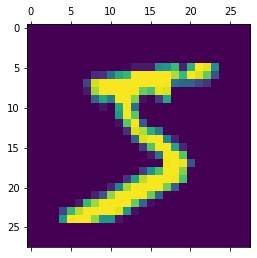

In [6]:
plt.matshow(x_train[0])

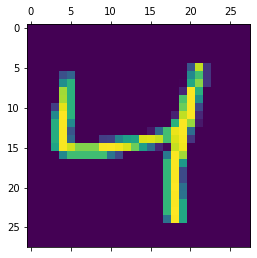

In [7]:
plt.matshow(x_train[2])

In [8]:
y_train[2]

4

In [9]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train=x_train/255
x_test=x_test/255

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_train_flattened.shape
x_test_flattened.shape

(10000, 784)

In [14]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='sigmoid') 
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4716 - accuracy: 0.8771
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2834 - accuracy: 0.9203
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2661 - accuracy: 0.9258


In [16]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 869us/step - loss: 0.2719 - accuracy: 0.9237


[0.2719078063964844, 0.9236999750137329]

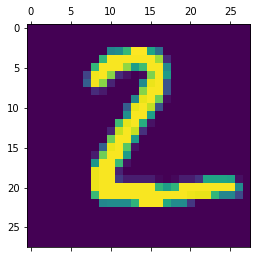

In [17]:
plt.matshow(x_test[1])

In [18]:
y_predicted=model.predict(x_test_flattened)
y_predicted[1]

array([3.3288938e-01, 7.2986186e-03, 9.9945647e-01, 5.1701677e-01,
       4.1240372e-10, 8.7351000e-01, 9.1352308e-01, 1.4747640e-12,
       1.6186827e-01, 3.4616394e-09], dtype=float32)

In [19]:
np.argmax(y_predicted[1])

2

In [20]:
y_predicted[:5]

array([[1.36250556e-02, 4.56991785e-07, 7.61075318e-02, 9.55709457e-01,
        1.91947818e-03, 8.67303908e-02, 1.35600692e-06, 9.99811530e-01,
        5.93370497e-02, 5.78446805e-01],
       [3.32889378e-01, 7.29861856e-03, 9.99456465e-01, 5.17016768e-01,
        4.12403722e-10, 8.73510003e-01, 9.13523078e-01, 1.47476400e-12,
        1.61868274e-01, 3.46163942e-09],
       [3.01688910e-04, 9.93935466e-01, 6.34882450e-01, 3.62512410e-01,
        2.01393962e-02, 8.60389471e-02, 1.49687648e-01, 1.66782707e-01,
        3.68683875e-01, 3.93625796e-02],
       [9.98016834e-01, 2.56204338e-08, 1.11243576e-01, 8.72141123e-03,
        2.46899417e-05, 1.03286654e-01, 1.56469852e-01, 1.54199600e-02,
        1.23700202e-02, 1.55402124e-02],
       [2.42163241e-02, 5.53876926e-05, 2.33348757e-01, 5.68124652e-03,
        9.86197948e-01, 1.12076700e-02, 2.05771565e-01, 2.11840332e-01,
        2.00223893e-01, 6.48267269e-01]], dtype=float32)

In [21]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [22]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 949,    0,    2,    3,    0,   10,   11,    2,    2,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   3,    9,  941,   18,    6,    3,   12,   10,   25,    5],
       [   0,    0,   18,  935,    0,   20,    2,   14,   14,    7],
       [   1,    2,    7,    2,  900,    0,   16,    7,    9,   38],
       [   7,    1,    6,   46,    8,  765,   17,    7,   28,    7],
       [   7,    3,    6,    1,    7,   10,  921,    2,    1,    0],
       [   1,    7,   23,    7,    4,    0,    0,  963,    1,   22],
       [   4,   11,    7,   42,    9,   29,    9,   15,  843,    5],
       [   7,    7,    3,   16,   27,    6,    0,   39,    2,  902]])>

In [24]:
!python -m pip install seaborn

Text(69.0, 0.5, 'Truth')

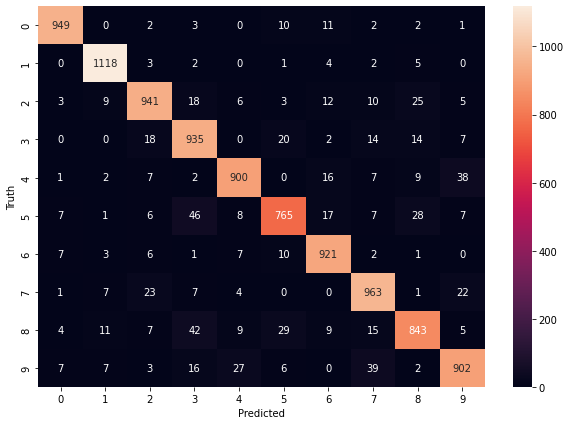

In [25]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [26]:
model=keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.9205: 0s - loss: 0.2813 - accuracy: 0.
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0866 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0655 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0500 - accuracy: 0.9845


In [27]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0841 - accuracy: 0.9749


[0.08405987173318863, 0.9749000072479248]

Text(69.0, 0.5, 'Truth')

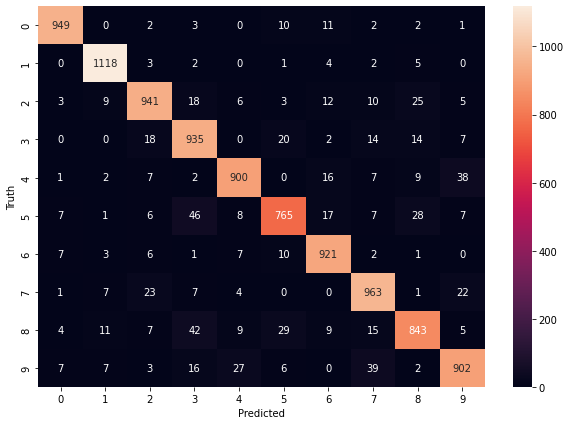

In [28]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [29]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2797 - accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1310 - accuracy: 0.9618
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0914 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0699 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0545 - accuracy: 0.9830
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0430 - accuracy: 0.9866
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0291 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0248 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.021